In [173]:
from scipy.io import loadmat
from matplotlib import pyplot as plt
import numpy as np

from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

In [174]:
folder = 'mc_500k'
dx = 0.5

results = loadmat(f"{folder}/uq_large.mat")
pressure = results["pressure"]
cov = results["cov"]
cov_mc = results["cov_mc"]

# To std
std = np.sqrt(cov)
std_mc = np.sqrt(cov_mc)

# Scaling to intercomparison values (in kPa)
pressure = pressure * 60_000 / 1.8513e+05 / 1e3
std = std * 60_000 / 1.8513e+05 / 1e3
std_mc = std_mc * 60_000 / 1.8513e+05 / 1e3

/tmp/ipykernel_15003/87657042.py:11: RuntimeWarning: invalid value encountered in sqrt
  std_mc = np.sqrt(cov_mc)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 537.42it/s]


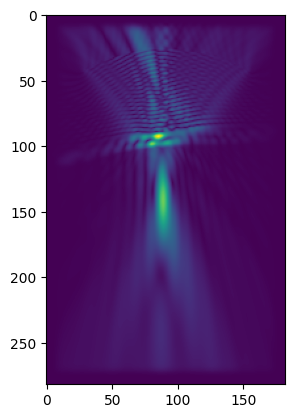

In [175]:
# Get mean simulation
from tqdm import trange

# Loads all MC runs for the pixel [141, 91]
mean_map_mc = 0.
for run in trange(200):
    mfile = loadmat(f"{folder}/mc_{run}.mat")
    mean_map_mc += mfile["pressure"] * 60_000 / 1.8513e+05 / 1e3 / 200

plt.imshow(mean_map_mc)

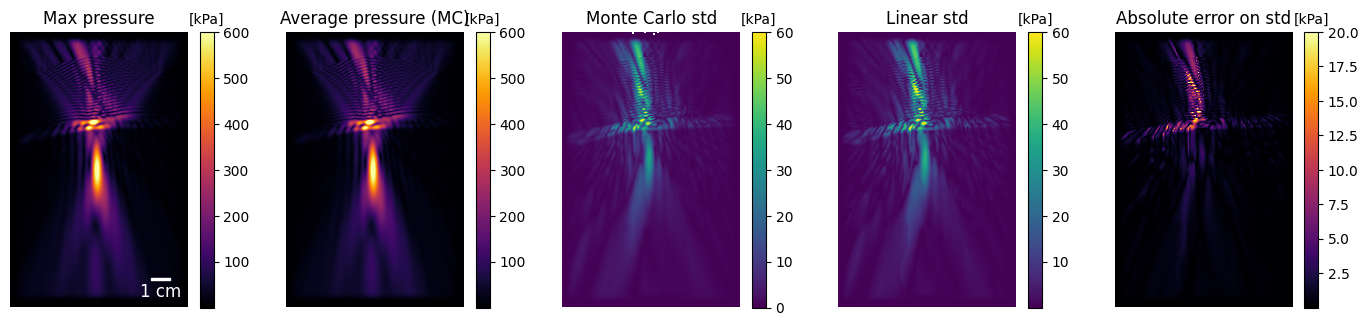

In [176]:
fig, ax = plt.subplots(1,5,figsize=(21/1.5,5/1.5))

im = ax[0].imshow(pressure, cmap="inferno", vmax=600)
ax[0].set_title("Max pressure")
ax[0].set_axis_off()
cbar = fig.colorbar(im, ax=ax[0])
cbar.ax.get_yaxis().labelpad = 5
cbar.ax.set_title("[kPa]",size=10)

# Scale bar
fontprops = fm.FontProperties(size=12)
scalebar = AnchoredSizeBar(
    ax[0].transData,
    20, '1 cm', 'lower right', 
    pad=0.3,
    color='white',
    frameon=False,
    size_vertical=2,
    fontproperties=fontprops)
ax[0].add_artist(scalebar)

im = ax[1].imshow(mean_map_mc, cmap="inferno", vmax=600)
ax[1].set_title("Average pressure (MC)")
ax[1].set_axis_off()
cbar = fig.colorbar(im, ax=ax[1])
cbar.ax.get_yaxis().labelpad = 5
cbar.ax.set_title("[kPa]",size=10)

im = ax[2].imshow(std_mc, vmax=60)
ax[2].set_title("Monte Carlo std")
cbar = fig.colorbar(im, ax=ax[2])
cbar.ax.get_yaxis().labelpad = 5
cbar.ax.set_title("[kPa]",size=10)
ax[2].set_axis_off()

im = ax[3].imshow(std, vmax=60)
ax[3].set_title("Linear std")
cbar = fig.colorbar(im, ax=ax[3])
cbar.ax.get_yaxis().labelpad = 5
cbar.ax.set_title("[kPa]",size=10)
ax[3].set_axis_off()

im = ax[4].imshow(np.abs(pressure - mean_map_mc), cmap="inferno", vmax=20)
ax[4].set_title("Absolute error on std")
cbar = fig.colorbar(im, ax=ax[4])
cbar.ax.get_yaxis().labelpad = 5
cbar.ax.set_title("[kPa]",size=10)
ax[4].set_axis_off()

plt.tight_layout()

plt.savefig('figures/pressure_std_error.eps', format='eps')

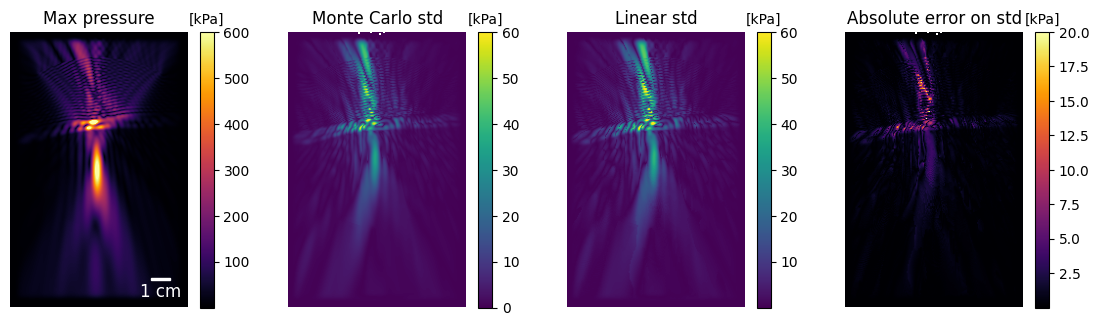

In [178]:
fig, ax = plt.subplots(1,4,figsize=(17/1.5,5/1.5))

im = ax[0].imshow(pressure, cmap="inferno", vmax=600)
ax[0].set_title("Max pressure")
ax[0].set_axis_off()
cbar = fig.colorbar(im, ax=ax[0])
cbar.ax.get_yaxis().labelpad = 5
cbar.ax.set_title("[kPa]",size=10)

# Scale bar
fontprops = fm.FontProperties(size=12)
scalebar = AnchoredSizeBar(
    ax[0].transData,
    20, '1 cm', 'lower right', 
    pad=0.3,
    color='white',
    frameon=False,
    size_vertical=2,
    fontproperties=fontprops)
ax[0].add_artist(scalebar)

im = ax[1].imshow(std_mc, vmax=60)
ax[1].set_title("Monte Carlo std")
cbar = fig.colorbar(im, ax=ax[1])
cbar.ax.get_yaxis().labelpad = 5
cbar.ax.set_title("[kPa]",size=10)
ax[1].set_axis_off()

im = ax[2].imshow(std, vmax=60)
ax[2].set_title("Linear std")
cbar = fig.colorbar(im, ax=ax[2])
cbar.ax.get_yaxis().labelpad = 5
cbar.ax.set_title("[kPa]",size=10)
ax[2].set_axis_off()

im = ax[3].imshow(np.abs(std - std_mc), cmap="inferno", vmax=20)
ax[3].set_title("Absolute error on std")
cbar = fig.colorbar(im, ax=ax[3])
cbar.ax.get_yaxis().labelpad = 5
cbar.ax.set_title("[kPa]",size=10)
ax[3].set_axis_off()

plt.tight_layout()

plt.savefig('figures/pressure_std_error.eps', format='eps')

In [179]:
# Finding peak location
new_pressure = pressure + 0.0
new_pressure[:120] = 0.0

idx = np.argmax(new_pressure)
r_peak, c_peak = np.unravel_index(idx, new_pressure.shape)
r_peak, c_peak

(141, 89)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


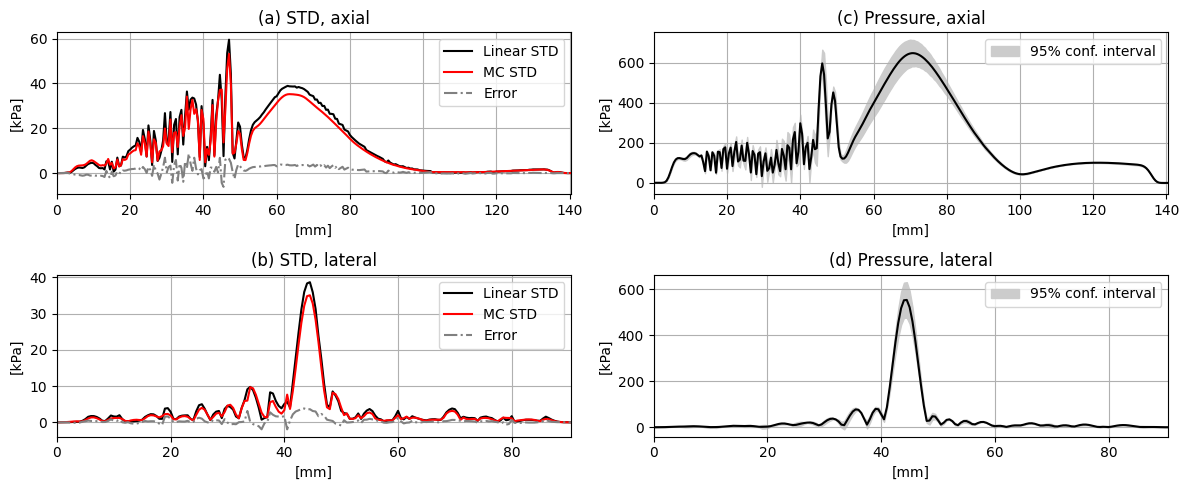

In [180]:
fig, ax = plt.subplots(2,2,figsize=(12,5))

x = np.arange(std.shape[0])*dx
ax[0,0].set_title("(a) STD, axial")
ax[0,0].plot(x, std[:,89], label="Linear STD", color="k")
ax[0,0].plot(x, std_mc[:,89], label="MC STD", color= "r")
ax[0,0].plot(x, std[:,89] - std_mc[:,89], color="gray", linestyle='-.', label="Error")
ax[0,0].set_xlabel("[mm]")
ax[0,0].set_ylabel("[kPa]")
ax[0,0].legend()
ax[0,0].set_xlim(x[0],x[-1])
ax[0,0].grid(True)

x = np.arange(std.shape[1])*dx
ax[1,0].set_title("(b) STD, lateral")
ax[1,0].plot(x, std[130], label="Linear STD", color="k")
ax[1,0].plot(x, std_mc[130], label="MC STD", color= "r")
ax[1,0].plot(x, std[130] - std_mc[130], color="gray", linestyle='-.', label="Error")
ax[1,0].set_xlabel("[mm]")
ax[1,0].set_ylabel("[kPa]")
ax[1,0].legend()
ax[1,0].set_xlim(x[0],x[-1])
ax[1,0].grid(True)

x = np.arange(std.shape[0])*dx
ax[0,1].set_title("(c) Pressure, axial")
ax[0,1].fill_between(x, pressure[:,89] - 2*std[:,89], pressure[:,89] + 2*std[:,89], color='#CCCCCC', label="95% conf. interval")
ax[0,1].plot(x, pressure[:,89], color='k')
ax[0,1].set_xlabel("[mm]")
ax[0,1].set_ylabel("[kPa]")
ax[0,1].legend()
ax[0,1].set_xlim(x[0],x[-1])
ax[0,1].grid(True)

x = np.arange(std.shape[1])*dx
ax[1,1].set_title("(d) Pressure, lateral")
ax[1,1].fill_between(x, pressure[130] - 2*std[130], pressure[130] + 2*std[130], color='#CCCCCC', label="95% conf. interval")
ax[1,1].plot(x, pressure[130], color='k')
ax[1,1].set_xlabel("[mm]")
ax[1,1].set_ylabel("[kPa]")
ax[1,1].legend()
ax[1,1].set_xlim(x[0],x[-1])
ax[1,1].grid(True)

plt.tight_layout()

plt.savefig('figures/line_plots.eps', format='eps')

In [181]:
from tqdm import tqdm

# Loads all MC runs for the pixel [141, 91]
pix_values = []
for run in trange(200):
    mfile = loadmat(f"{folder}/mc_{run}.mat")
    pix_value = mfile["pressure"][130, 89] * 60_000 / 1.8513e+05 / 1e3
    pix_values.append(pix_value)
    
# Shuffle pixels
np.random.shuffle(pix_values)
    
pix_groups = [pix_values[i:i+20] for i in [0,20,40,60,80,100,120,140,160,180]]

groups = []
for pv in tqdm(pix_groups):
    # Get cumulative variance
    x_sq = []
    x_mean = []
    std_mc_over_time = []
    for run in range(1,21):
        x = pv[run-1]
        if run == 1:
            x_sq = [x**2]
            x_mean = [x]
            std_mc_over_time = [np.sqrt(x_sq[-1] - x_mean[-1]**2)]
        else:
            x_sq.append((x_sq[-1]*(run-1) + x**2)/run)
            x_mean.append((x_mean[-1]*(run-1) + x)/run)
            std_mc_over_time.append(np.sqrt((x_sq[-1] - x_mean[-1]**2)*run/(run-1)))
    
    # Save
    groups.append(std_mc_over_time)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 9868.95it/s]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


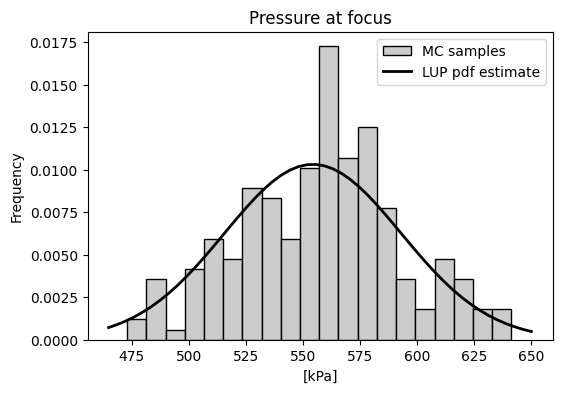

In [182]:
import scipy.stats as stats

x = np.linspace(465, 650)
mu = pressure[130, 89]
std_pixel = std[130, 89]

plt.figure(figsize=(6,4))
plt.hist(pix_values, density=True, bins=20, edgecolor = "black", color="#CCCCCC", label="MC samples")
plt.plot(x, stats.norm.pdf(x, mu, std_pixel), color="k", linewidth=2, label="LUP pdf estimate")
plt.xlabel("[kPa]")
plt.ylabel("Frequency")
#std_mc_samples = np.std(pix_values)
#plt.plot(x, stats.norm.pdf(x, mu, std_mc_samples), color="g", linewidth=2, label="LUP pdf estimate")
plt.legend()
plt.title("Pressure at focus")

plt.savefig('figures/hist_at_peak_std.eps', format='eps')

In [183]:
from tqdm import tqdm

# Loads all MC runs for the pixel [141, 91]
pix_values = []
for run in trange(200):
    mfile = loadmat(f"{folder}/mc_{run}.mat")
    pix_value = mfile["pressure"][r_peak, c_peak] * 60_000 / 1.8513e+05 / 1e3
    pix_values.append(pix_value)
    
# Shuffle pixels
np.random.shuffle(pix_values)
    
pix_groups = [pix_values[i:i+20] for i in [0,20,40,60,80,100,120,140,160,180]]

groups = []
for pv in tqdm(pix_groups):
    # Get cumulative variance
    x_sq = []
    x_mean = []
    std_mc_over_time = []
    for run in range(1,21):
        x = pv[run-1]
        if run == 1:
            x_sq = [x**2]
            x_mean = [x]
            std_mc_over_time = [np.sqrt(x_sq[-1] - x_mean[-1]**2)]
        else:
            x_sq.append((x_sq[-1]*(run-1) + x**2)/run)
            x_mean.append((x_mean[-1]*(run-1) + x)/run)
            std_mc_over_time.append(np.sqrt((x_sq[-1] - x_mean[-1]**2)*run/(run-1)))
    
    # Save
    groups.append(std_mc_over_time)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 8568.55it/s]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


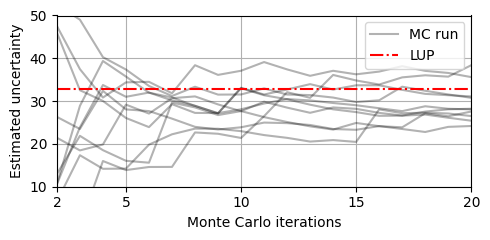

In [165]:
plt.figure(figsize=(5,2.5))
x = np.arange(1,21)
for std_mc_over_time, iter_num in zip(groups, range(len(groups))):
    if iter_num == 0:
        plt.plot(x[1:],std_mc_over_time[1:], color='k', alpha=0.3, label="MC run")
    else:
        plt.plot(x[1:],std_mc_over_time[1:], color='k', alpha=0.3)
plt.hlines(std_pixel, x[1], x[-1], color='r', linestyle='-.', label="LUP")
plt.legend(loc="upper right")
plt.grid(which="both")
#plt.xscale("log")
plt.xlim([2,20])
plt.xticks([2,5,10,15,20],[2,5,10,15,20])
plt.ylim([10,50])

plt.xlabel("Monte Carlo iterations")
plt.ylabel("Estimated uncertainty")

plt.tight_layout()

plt.savefig('figures/mc_convergence.eps', format='eps')

In [166]:
from tqdm import trange

# Loads all MC runs for the pixel [141, 91]
pix_values = []
for run in trange(200):
    mfile = loadmat(f"{folder}/mc_{run}.mat")
    pix_value = mfile["pressure"][r_peak, c_peak] * 60_000 / 1.8513e+05 / 1e3
    pix_values.append(pix_value)

# Shuffle pixels
np.random.shuffle(pix_values)

x_sq = []
x_mean = []
std_mc_over_time = []
for run in trange(1,201):
    x = pix_values[run-1]
    if run == 1:
        x_sq = [x**2]
        x_mean = [x]
        std_mc_over_time = [np.sqrt(x_sq[-1] - x_mean[-1]**2)]
    else:
        x_sq.append((x_sq[-1]*(run-1) + x**2)/run)
        x_mean.append((x_mean[-1]*(run-1) + x)/run)
        std_mc_over_time.append(np.sqrt((x_sq[-1] - x_mean[-1]**2)*run/(run-1)))


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 340308.64it/s]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


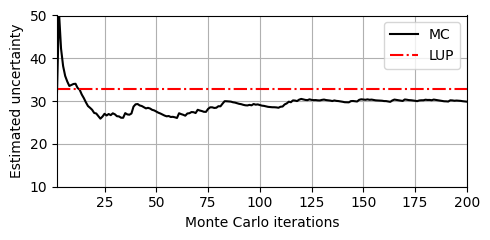

In [167]:
plt.figure(figsize=(5,2.5))
x = np.arange(1,201)
plt.plot(x[1:],std_mc_over_time[1:], color='k', label="MC")
plt.hlines(std_pixel, x[1], x[-1], color='r', linestyle='-.', label="LUP")
plt.legend(loc="upper right")
plt.grid(which="both")
#plt.xscale("log")
plt.xlim([2,200])
#plt.xticks([2,3,4,5,7,10,20,30,40,50,70,100,200],[2,3,4,5,7,10,20,30,40,50,70,100,200])
plt.ylim([10, 50])
plt.xlabel("Monte Carlo iterations")
plt.ylabel("Estimated uncertainty")


plt.tight_layout()


plt.savefig('figures/mc_convergence_long.eps', format='eps')